# BikeMaps.Org Data for Victoria, BC

# Abstract

# Introduction 

# Methods

# Results

# Discussion

# Conclusion

## Data Exploration

In [242]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import numpy as np
import pysal
import pysal.spatial_dynamics.interaction as interaction
np.random.seed(100)
import datetime


In [185]:
collisions = pd.read_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/col.csv')
collisions.dtypes

#collisions["t"] = collisions.date.apply(datetime.datetime.strptime, '%Y-%m-%d %H:%M:%S')
#collisions["time"] = collisions.date.apply(datetime.date.isoformat)

i_type               object
incident_with        object
date                 object
p_type               object
details              object
incident_effect      object
injury               object
trip_purpose         object
regular_cyclist      object
helmet               object
intoxicated          object
road_conditions      object
sightlines           object
cars_on_roadside     object
riding_on            object
bike_lights          object
terrain              object
direction            object
turning              object
age                 float64
birthmonth          float64
sex                  object
pk                    int64
x                   float64
y                   float64
dtype: object

In [3]:
theft = pd.read_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/theft.csv')
theft.head()

,i_type,date,p_type,details,how_locked,lock,locked_to,lighting,traffic,police_report,police_report_num,insurance_claim,insurance_claim_num,regular_cyclist,pk,longitude,latitude
0,Minor bike component,2015-06-29T19:30:00,theft,Quick release removed from back wheel - i.e. i...,Frame and tire locked,U-Lock,Good,NaN,Medium,True,T15000455,False,NaN,Y,1253,-123.386807,48.437529
1,Bike (value < $1000),2015-07-28T02:00:00,theft,Bike stolen from under the Petch Building bree...,Frame locked,Cable lock,Moderate,NaN,Very Low,True,NaN,False,NaN,Y,1421,-123.310697,48.461660
2,Minor bike component,2015-07-24T21:30:00,theft,Bike helmet stolen. It was not locked.,Frame and tire locked,Cable lock,Moderate,NaN,High,False,NaN,False,NaN,Y,1493,-123.364642,48.427851
3,Bike (value < $1000),2015-04-17T21:00:00,theft,parked at work inside locked bike cage room. D...,Not locked,NaN,Moderate,NaN,Very Low,True,NaN,False,NaN,Y,1614,-123.361670,48.426880
4,Bike (value < $1000),2015-02-03T17:30:00,theft,"This was an unfortunate situation where I ""loc...",Not locked,NaN,Good,NaN,Low,True,NaN,False,NaN,Y,1636,-123.378739,48.440147


In [34]:
#hazards = pd.read_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/hazards.csv')

In [4]:
near_miss = pd.read_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/near_miss.csv')

In [36]:
#collisions.dtypes

In [197]:
#collisions['T'] = pd.to_datetime(collisions['date'], format='%Y-%m-%dT%H:%M:%S')

#collisions.head()


#pd.to_datetime('2014-12-04 22:30:00')

#pd.Timestamp(np.datetime64('2014-12-04 22:30:00'))


date = collisions['date']


def changetime(x):
    t1 = pd.to_datetime(x, format ='%Y-%m-%dT%H:%M:%S')
    #t2 = pd.Timestamp(np.datetime64(t1))
    t3 = t1.to_pydatetime()
    return t3

                               
collisions['T_test3'] = collisions['date'].apply(changetime)

collisions['T_test3']

#collisions.dtypes

#y = changetime('2017-02-03T17:30:00')

#y

#type(y)

collisions['just_date'] = collisions['T_test3'].dt.date

collisions.head()


,i_type,incident_with,date,p_type,details,incident_effect,injury,trip_purpose,regular_cyclist,helmet,...,turning,age,birthmonth,sex,pk,x,y,T_test3,timee,just_date
0,Collision with moving object or vehicle,"Vehicle, angle",2014-12-04T22:30:00,collision,Cab pulled an illegal u-turn and I collided wi...,NaN,No injury,Social reason,Y,Y,...,Heading straight,NaN,NaN,M,1090,-123.343377,48.434454,2014-12-04 22:30:00,2014-12-04 22:30:00,2014-12-04
1,Collision with moving object or vehicle,"Vehicle, side",2015-07-28T10:30:00,collision,Vehicle turned left into my lane. I was unable...,NaN,"Injury, hospital emergency visit",Exercise or recreation,Y,Y,...,Heading straight,1941,5,M,1427,-123.418093,48.621903,2015-07-28 10:30:00,2015-07-28 10:30:00,2015-07-28
2,Collision with moving object or vehicle,"Vehicle, head on",2015-06-02T17:20:00,collision,I attended an head on accident between two mal...,NaN,"Injury, hospitalized",Exercise or recreation,NaN,NaN,...,Turning left,NaN,NaN,NaN,1510,-123.398636,48.592406,2015-06-02 17:20:00,2015-06-02 17:20:00,2015-06-02
3,Collision with moving object or vehicle,Another cyclist,2015-05-06T09:00:00,collision,I was traveling south on Borden crossing McKen...,NaN,"Injury, no treatment",Commute,Y,Y,...,Turning right,1958,7,M,917,-123.361423,48.470311,2015-05-06 09:00:00,2015-05-06 09:00:00,2015-05-06
4,Fall,Train Tracks,2015-05-30T17:30:00,collision,Riding up the hill and my wheel caught in the ...,NaN,"Injury, no treatment",Commute,Y,Y,...,Heading straight,1955,4,F,1052,-123.475707,48.447650,2015-05-30 17:30:00,2015-05-30 17:30:00,2015-05-30


In [198]:
#from shapely.geometry import Point
#collisions['geometry'] = collisions.apply(lambda x: Point((float(x.x), float(x.y))), axis=1)

#import geopandas
#gp_collisions = geopandas.GeoDataFrame(collisions, geometry='geometry')

#gp_collisions.head()

#gp_collisions.to_file('collisions_2.shp', driver='ESRI Shapefile')

In [217]:
collisions3 = collisions[['x', 'y', 'date']]

collisions3.head()

collisions3.to_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/xytime_collisions.csv')

In [218]:
path = "/anaconda/lib/python3.5/site-packages/pysal/examples/burkitt/burkitt.shp" 

#hacking work around- re-named my data to match the example data in PySAL examples folder 

In [222]:
events = interaction.SpaceTimeEvents(path, 'date', infer_timestamp = True)
events.n 

events.space[0]

events.t[0] #time not in the rigth formatt- must be in Python datetime 
#events.t[1] - events.t[0]

#np.random.seed(100)

#result = interaction.modified_knox(events.space, events.t,delta=20,tau=5,permutations=99)

#print("%2.8f"%result['stat'])


Unable to parse your time column as Python datetime                       objects, proceeding as integers.


array(['2014-12-04T22:30:00'], 
      dtype='<U19')

In [223]:
b = pd.read_csv('/Users/marthamorrissey/Documents/pysal_example_burkitt.csv')

b.head()

#b.dtypes

,X,Y,ID,X.1,Y.1,T,AGE,DATE
0,300,302,1,300,302,413,22,1901/02/16
1,291,270,2,291,270,472,5,1901/04/16
2,326,263,3,326,263,511,12,1901/05/25
3,299,376,4,299,376,689,6,1901/11/19
4,267,327,5,267,327,730,4,1901/12/30


In [80]:
#path2 = "/anaconda/lib/python3.5/site-packages/pysal/examples/c2/c2.dbf"

In [11]:
#events = interaction.SpaceTimeEvents(path2, 'T')

In [10]:
#pysal.examples.get_path('c2')

In [238]:
import scipy
import treelib
import pyclust
from scipy.spatial.distance import squareform, pdist

collisions_matrix_df = collisions[['x', 'y']]


collisions_matrix_df.insert(0, 'Crash_ID', range(0, 0 + len(collisions_matrix_df)))

collisions_matrix_df
    
x = pd.DataFrame(squareform(pdist(collisions_matrix_df.ix[:, 1:])), columns=collisions_matrix_df.Crash_ID.unique(), index=collisions_matrix_df.Crash_ID.unique())

x
#collisions_matrix_df['crash_site']

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,0.000000,0.201791,0.167339,0.040142,0.132986,0.027530,0.064074,0.024000,0.011151,0.035190,...,0.052633,0.027961,0.016785,0.038320,0.027958,0.044633,0.066274,0.022820,0.017596,0.026044
1,0.201791,0.000000,0.035336,0.161838,0.183531,0.199923,0.157706,0.192894,0.197405,0.179678,...,0.165981,0.229742,0.207763,0.167513,0.201404,0.193781,0.192186,0.197720,0.205099,0.217537
2,0.167339,0.035336,0.000000,0.127640,0.163994,0.167035,0.127117,0.159696,0.163457,0.146951,...,0.134401,0.195240,0.174082,0.134124,0.168540,0.162267,0.162859,0.164504,0.171522,0.184111
3,0.040142,0.161838,0.127640,0.000000,0.116509,0.043361,0.038449,0.035008,0.035964,0.027440,...,0.031306,0.068074,0.047022,0.013091,0.044866,0.047776,0.062795,0.039393,0.044777,0.057565
4,0.132986,0.183531,0.163994,0.116509,0.000000,0.107454,0.078181,0.109012,0.121850,0.099522,...,0.086046,0.148576,0.121939,0.105756,0.107726,0.089530,0.068547,0.110974,0.119164,0.122814
5,0.027530,0.199923,0.167035,0.043361,0.107454,0.000000,0.047652,0.008443,0.017162,0.020289,...,0.036540,0.042321,0.014563,0.033379,0.001531,0.017938,0.039453,0.005324,0.011710,0.019297
6,0.064074,0.157706,0.127117,0.038449,0.078181,0.047652,0.000000,0.043663,0.054261,0.029556,...,0.011599,0.087833,0.060176,0.029011,0.048851,0.036710,0.036756,0.047868,0.057011,0.066947
7,0.024000,0.192894,0.159696,0.035008,0.109012,0.008443,0.043663,0.000000,0.012850,0.014409,...,0.032129,0.044248,0.016560,0.025629,0.009908,0.021171,0.042566,0.004827,0.013422,0.024809
8,0.011151,0.197405,0.163457,0.035964,0.121850,0.017162,0.054261,0.012850,0.000000,0.024852,...,0.042688,0.034375,0.011552,0.030845,0.017876,0.033626,0.055218,0.012074,0.010242,0.022425
9,0.035190,0.179678,0.146951,0.027440,0.099522,0.020289,0.029556,0.014409,0.024852,0.000000,...,0.017958,0.058311,0.030945,0.015009,0.021748,0.020346,0.037520,0.018988,0.027823,0.038882


In [ ]:
#pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)

In [245]:
def plot_scatter(X, labels=None, title="Scatter Plot"):
    
    labels = np.zeros(shape=X.shape[0], dtype=int) if labels is None else labels
    colors = ['b', 'r', 'g', 'm', 'y']
    col_dict = {}
    i = 0
    for lab in np.unique(labels):
        col_dict[lab] = colors[i]
        i += 1 
    
    fig1 = plt.figure(1, figsize=(8,6))
    ax = fig1.add_subplot(1, 1, 1)

    for i in np.unique(labels):
        indx = np.where(labels == i)[0]
        plt.scatter(X[indx,0], X[indx,1], color=col_dict[i], marker='o', s=100, alpha=0.5)

    plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=16)
    plt.setp(ax.get_yticklabels(), rotation='vertical', fontsize=16)

    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    plt.title(title, size=20)

    plt.show()

[[ 0.0456954   0.17742199]
 [ 0.02052203  0.20447087]
 [ 0.28345855  0.3197601 ]
 [ 0.0994838   0.15326807]
 [ 0.19261666  0.02913908]]


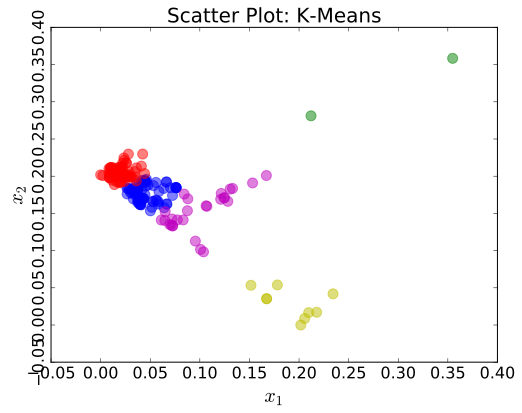

In [250]:
km = pyclust.KMeans(n_clusters=5)

km.fit(x.iloc[:,0:2].values)

print(km.centers_)

plot_scatter(x.iloc[:,0:2].values, labels=km.labels_, title="Scatter Plot: K-Means")